> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Movie theatre]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
1. id - Identification of the movie
2. imdb_id - Box office identification of the movie
3. popularity - Popularity rating of the movie
4. budget - The budget used to create the movie
5. revenue - The revenue generated from the movie
6. original_title - Original title of the movie 
7. cast - The cast of the movie
8. homepage - The homepage of the movie website
9. director - The director of the movie
10. tagline - The tagline phrase of the movie
11. keywords - Keywords usually attached to the title of the movie on posters and flyers
12. overview - Brief summary of the movie play
13. runtime - The total runtime of the movie
14. genres - The genre of movie production the movie fits into
15. production_companies - Companies involved in the production of the movie
16. release_date - The sate the movie was released
17. vote_count - Number of votes counted on behalf of the movie
18. vote_average - Average number of votes cast
19. release_year - Year of movie release
20. budget_adj - Total movie budget adjusted for inflation
21. revenue_adj - Total movie revenue adjusted for inflation



### Question(s) for Analysis
1. What are the Top 5 most profitable movies?
2. Is the profitability of movies associated with its budget (adjusted)?
3. Is the runtime of a movie associated with its profitabilty?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
#importing important files 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [5]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#loading the csv file and storing it in the variable "tmbd_data"
data = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [4]:
# inspect the data
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Who are the directors?
data.director.unique()

array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke', ...,
       'Alan Rafkin', 'Bruce Brown', 'Harold P. Warren'], dtype=object)

In [7]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# count rows where budget, revenue and runtime are equal to 0
len(data[data.runtime == 0]), len(data[data.revenue_adj == 0]), len(data[data.budget_adj == 0])

(31, 6016, 5696)

In [9]:
# check for duplicates
data.duplicated().sum()

1


### Data Cleaning


- Drop the irrelevant variables names.
- Drop duplicates rows.
- Remove rows with movie runtime of 0.
- Convert release_date from string to date.
- Remove rows with no budget and/or revenue i.e revenue == 0.

In [10]:
# Drop the irrelevent
# make a copy of the dataset
df = data

# a list of columns to be deleted
del_col= ['popularity', 'homepage', 'keywords', 'cast', 'tagline',
          'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
df.drop(del_col, 1, inplace=True)

#previewing the new dataset
df.head(4)

,id,imdb_id,budget,revenue,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09


In [11]:
# drop duplicates
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [12]:
# Remove rows with runtime of 0

df.drop(df[df.runtime == 0].index, inplace=True)

df[df.runtime == 0]

,id,imdb_id,budget,revenue,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj


In [13]:
# Remove rows with no budget and/or revenue

no_br = (df.budget == 0) | (df.revenue == 0)

df.drop(df[no_br].index, inplace=True)

df[no_br]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,id,imdb_id,budget,revenue,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj


In [14]:
# convert release_date to datetime

df.release_date = pd.to_datetime(df.release_date)

In [15]:
df[['release_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 1 columns):
release_date    3854 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 60.2 KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the top 5 movies with most profit?

In [16]:
# Profit: Adjusted Revenue - Adjusted Budget

df['profit'] = df.revenue_adj - df.budget_adj

In [17]:
df.profit.describe()

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: profit, dtype: float64

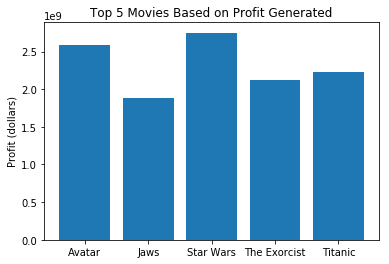

In [57]:
profit = df.profit

# top five
ind = profit.sort_values(ascending=False).iloc[0:5, ].index

top_5 = df.loc[ind, :][['original_title', 'profit']]
plt.title("Top 5 Movies Based on Profit Generated")
plt.ylabel("Profit (dollars)")
plt.bar(top_5.original_title, top_5.profit);

Star wars, Avatar, Titanic, The Exorcist and Jaws were the five most profitable movies. Star wars accrued a profit of 2.75E09 dollars while Jaws had 1.88E09 dollars.

### Research Question 2  - Is the profitability of movies associated with adjusted budget?

In [83]:
# helper function to plot relationship

def plot_relationship(x='budget_adj', y='profit', xlab="Adjusted Budget (dollars)", 
                      ylab="Profit (dollars)", title="Relationship between Profit and Adjusted Budget"):
    """
      x:     str - The x-axis column in the dataframe
      y:     str - The y-axis column in the dataframe
      xlab:  str - The x-axis label of the plot
      ylab:  str - The y-axis label of the plot
      title: str - The title of the plot
    """
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.scatter(x, y, data = df);

In [77]:
# Correlation between adjusted budget and profit
df[['profit', 'budget_adj']].corr()

,profit,budget_adj
profit,1.000000,0.404344
budget_adj,0.404344,1.000000


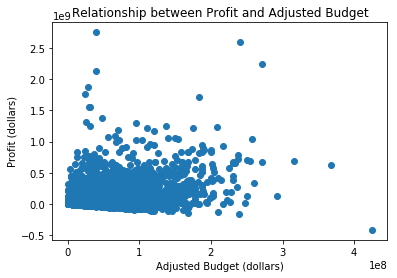

In [84]:
# Plot the association
plot_relationship('budget_adj', 'profit');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


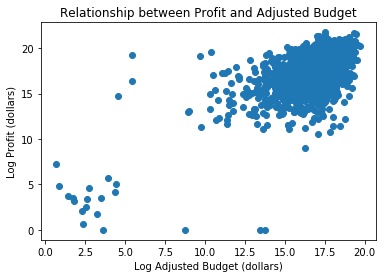

In [85]:
# Take the log in order to create a better plot

df['log_profit'] = np.log1p(df.profit)
df['log_budget_adj'] = np.log1p(df.budget_adj)

xlab = "Log Adjusted Budget (dollars)"
ylab = "Log Profit (dollars)"
plot_relationship('log_budget_adj', 'log_profit', xlab=xlab, ylab=ylab);

In [80]:
df[['log_profit', 'log_budget_adj']].corr()

,log_profit,log_budget_adj
log_profit,1.000000,0.665237
log_budget_adj,0.665237,1.000000


From the tables and plots above, increasing budget is seen to be associated with increasing profit. The log relationship yielded a better correlation coefficient of 0.665.

## Research Question 3 : Is Runtime Associated with Profitability?

In [82]:
# Descriptive statistics of runtime
df[['runtime']].describe()

,runtime
count,3854.000000
mean,109.220291
std,19.922820
min,15.000000
25%,95.000000
50%,106.000000
75%,119.000000
max,338.000000


The runtime ranged between 15 - 338 minutes with an average of 109.2 minutes. The plot below showed the distribution of the runtime. Most of the movies were around the 100 minute mark.

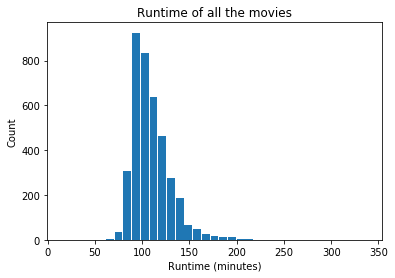

In [88]:
#plotting a histogram of runtime of movies
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.title('Runtime of all the movies')

#giving a histogram plot
plt.hist(df.runtime, rwidth = 0.9, bins =35)
plt.show();

The plot below showed the relationship between runtime and profit

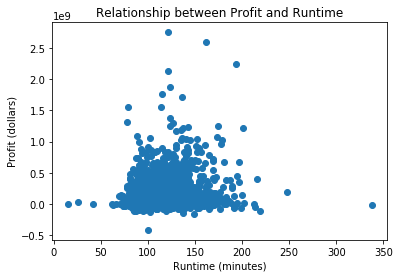

In [90]:
plot_relationship('runtime', 'profit', xlab="Runtime (minutes)", 
                  title="Relationship between Profit and Runtime")

In [93]:
# getting the correlation
df[['runtime', 'profit']].corr()

,runtime,profit
runtime,1.000000,0.235249
profit,0.235249,1.000000


It appeared that an increasing runtime was met with an increase in profit.

<a id='conclusions'></a>
## Conclusions

> **Note**: The exploratory analysis done was only tentative.
  
- The top five profitable movies in descending order were Star wars, Avatar, Titanic, The Exorcist and Jaws.

- Increasing budget was associated with increasing profit. The trend between the log of both adjusted budget and runtime created a clearer picture.

- The average runtime of all movies was 109 minutes. Profit appeared to increase as runtime increased although the correlation coefficient was quite weak.

### Limitations
#### We are not sure if the data given to us is recent and we have no way of knowing if it is entirely true or correct. In addition to this it is important to note that there were some rows which were dropped due to missing values and this could affect the credibility of the entire analysis. 

## Submitting your Project 

In [98]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0